In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
np.random.seed(42)

num_samples = 100

Feature1 = np.random.uniform(50, 100, num_samples)
Feature2 = np.random.uniform(30, 90, num_samples)
Feature3 = np.random.uniform(10, 80, num_samples)
Feature4 = np.random.uniform(0, 100, num_samples)
Feature5 = np.random.uniform(20, 85, num_samples)


weights = [0.5, 0.3, 0.2, 0.1, 0.4]
Grade = (
    Feature1 * weights[0] +
    Feature2 * weights[1] +
    Feature3 * weights[2] +
    Feature4 * weights[3] +
    Feature5 * weights[4] +
    np.random.normal(0, 5, num_samples)
)


data = pd.DataFrame({
    "Feature1": Feature1,
    "Feature2": Feature2,
    "Feature3": Feature3,
    "Feature4": Feature4,
    "Feature5": Feature5,
    "Grade": Grade
})


X = data.drop(columns=["Grade"])
y = data["Grade"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [4]:

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

coefficients = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
print("\nFeature Coefficients:")
print(coefficients)


Model Evaluation:
Mean Squared Error: 23.91
R-squared Score: 0.87

Feature Coefficients:
          Coefficient
Feature1     0.612054
Feature2     0.316225
Feature3     0.181691
Feature4     0.054580
Feature5     0.416066


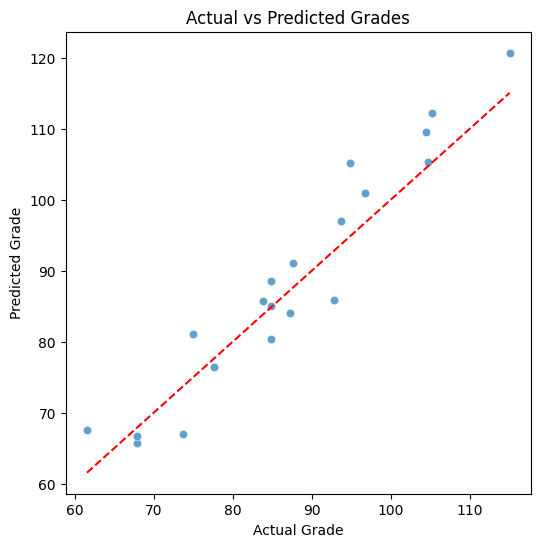

In [7]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Actual Grade")
plt.ylabel("Predicted Grade")
plt.title("Actual vs Predicted Grades")
plt.show()